# Importing Libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
import nltk

nltk.download('punkt_tab') 
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loding Dataset

In [4]:
df = pd.read_csv('amazon-fine-food-reviews/reviews.csv')
print(f"original dataset shape: {df.shape}")

df = df.head(500)
print(f"new dataset shape: {df.shape}")

df.head()

original dataset shape: (568454, 10)
new dataset shape: (500, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Exploration

#### Finding if any null values exists

In [5]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

#### Visualizing Count of Review by stars

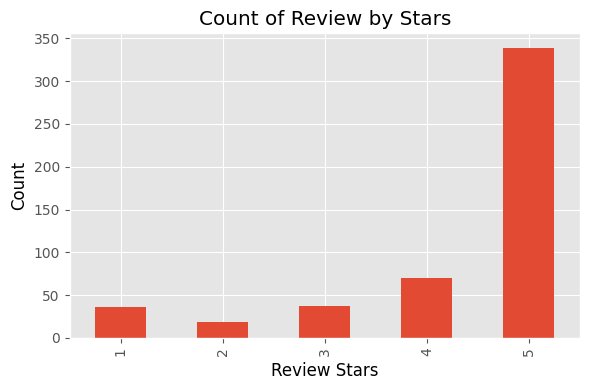

In [6]:
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(6, 4),
)
ax.set_title('Count of Review by Stars', color='black')
ax.set_xlabel('Review Stars', color='black')
ax.set_ylabel('Count', color='black')
plt.tight_layout()
plt.show()

### Basic NLTK operations

In [ ]:
# let's take an example from the df
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
# Tokenizer

tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [ ]:
# POS Tagging

tagged = nltk.pos_tag(tokens)    # This returns a list of (token, POS_tag) tuples for each token.
tagged[:10]     

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
# Let's group them into chucks

entities = nltk.chunk.ne_chunk(tagged)   # Takes A list of (token, POS_tag) tuples as INPUT and returns NLTK Tree with named entities grouped and labeled
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


________________

# 1 - *NLTK* Vader Sentiment Scoring

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

`polarity_scores` is a built-in method of NLTK’s SentimentIntensityAnalyzer class

In [62]:
print(f"I am so happy!: {sia.polarity_scores('I am so happy!')}")

print(f"I am not so sad!: {sia.polarity_scores('I am not so sad!')}")

print(f"This is the worst thing ever: {sia.polarity_scores('This is the worst thing ever')}")

I am so happy!: {'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
I am not so sad!: {'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.5432}
This is the worst thing ever: {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


In [60]:
# Let's check the polarity score of the example we took earlier

print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Find polarity scores on all examples 
vaders = df['Text'].apply(sia.polarity_scores).apply(pd.Series)

# Join the Polarity scores to the df
vaders['Id'] = df['Id']
vaders = vaders.merge(df, on='Id', how='left')

# Rename the columns for better clarity when comparing with tranformers later
vaders = vaders.rename(columns={
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound'
})

# Move 'Id' to the first column
vaders = vaders[['Id'] + [col for col in vaders.columns if col != 'Id']]

In [44]:
vaders.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plot Vader Results

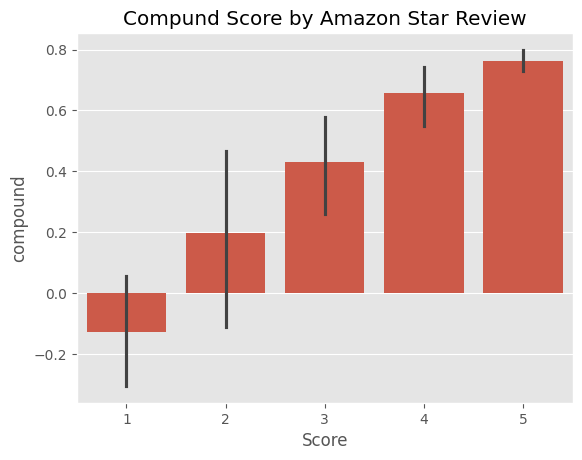

In [18]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

We can see that higher the coumpound --> higher the ratings

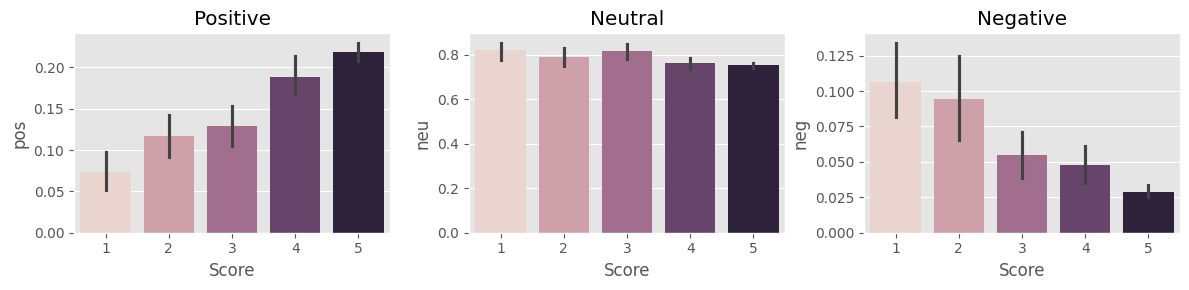

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', hue='Score', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', hue='Score', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', hue='Score', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[0].legend_.remove()
axs[1].legend_.remove()
axs[2].legend_.remove()
plt.tight_layout()
plt.show()

__________

# 2 - *Transformer* Roberta Sentiment Scoring

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

c:\Users\rk\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Loading `twitter-roberta-base-sentiment` model

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# Funtion to calculate polarity scores using roberta
def polarity_scores_roberta(text, max_length=512):
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True, max_length=max_length)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

In [65]:
# Let's check the polarity score using roberta of the example we took earlier

print(example)
polarity_scores_roberta(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687466,
 'roberta_pos': 0.0029573692}

In [ ]:
# Run Polarity function on the entire dataset
roberta_results = vaders['Text'].apply(lambda x: polarity_scores_roberta(x))

roberta_df = pd.DataFrame(list(roberta_results))

roberta_df.head()

,roberta_neg,roberta_neu,roberta_pos
0,0.009624,0.049980,0.940395
1,0.508986,0.452414,0.038600
2,0.003229,0.098067,0.898704
3,0.002295,0.090219,0.907486
4,0.001635,0.010302,0.988063


In [ ]:
# Join the vader df and roberta polarity score df
results_df = pd.concat([roberta_df, vaders.reset_index(drop=True)], axis=1)

# Move 'Id' to the first column
results_df = results_df[['Id'] + [col for col in results_df.columns if col != 'Id']]

results_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


_______________

# Pairplot comparison of `Vader vs  Roberta` results

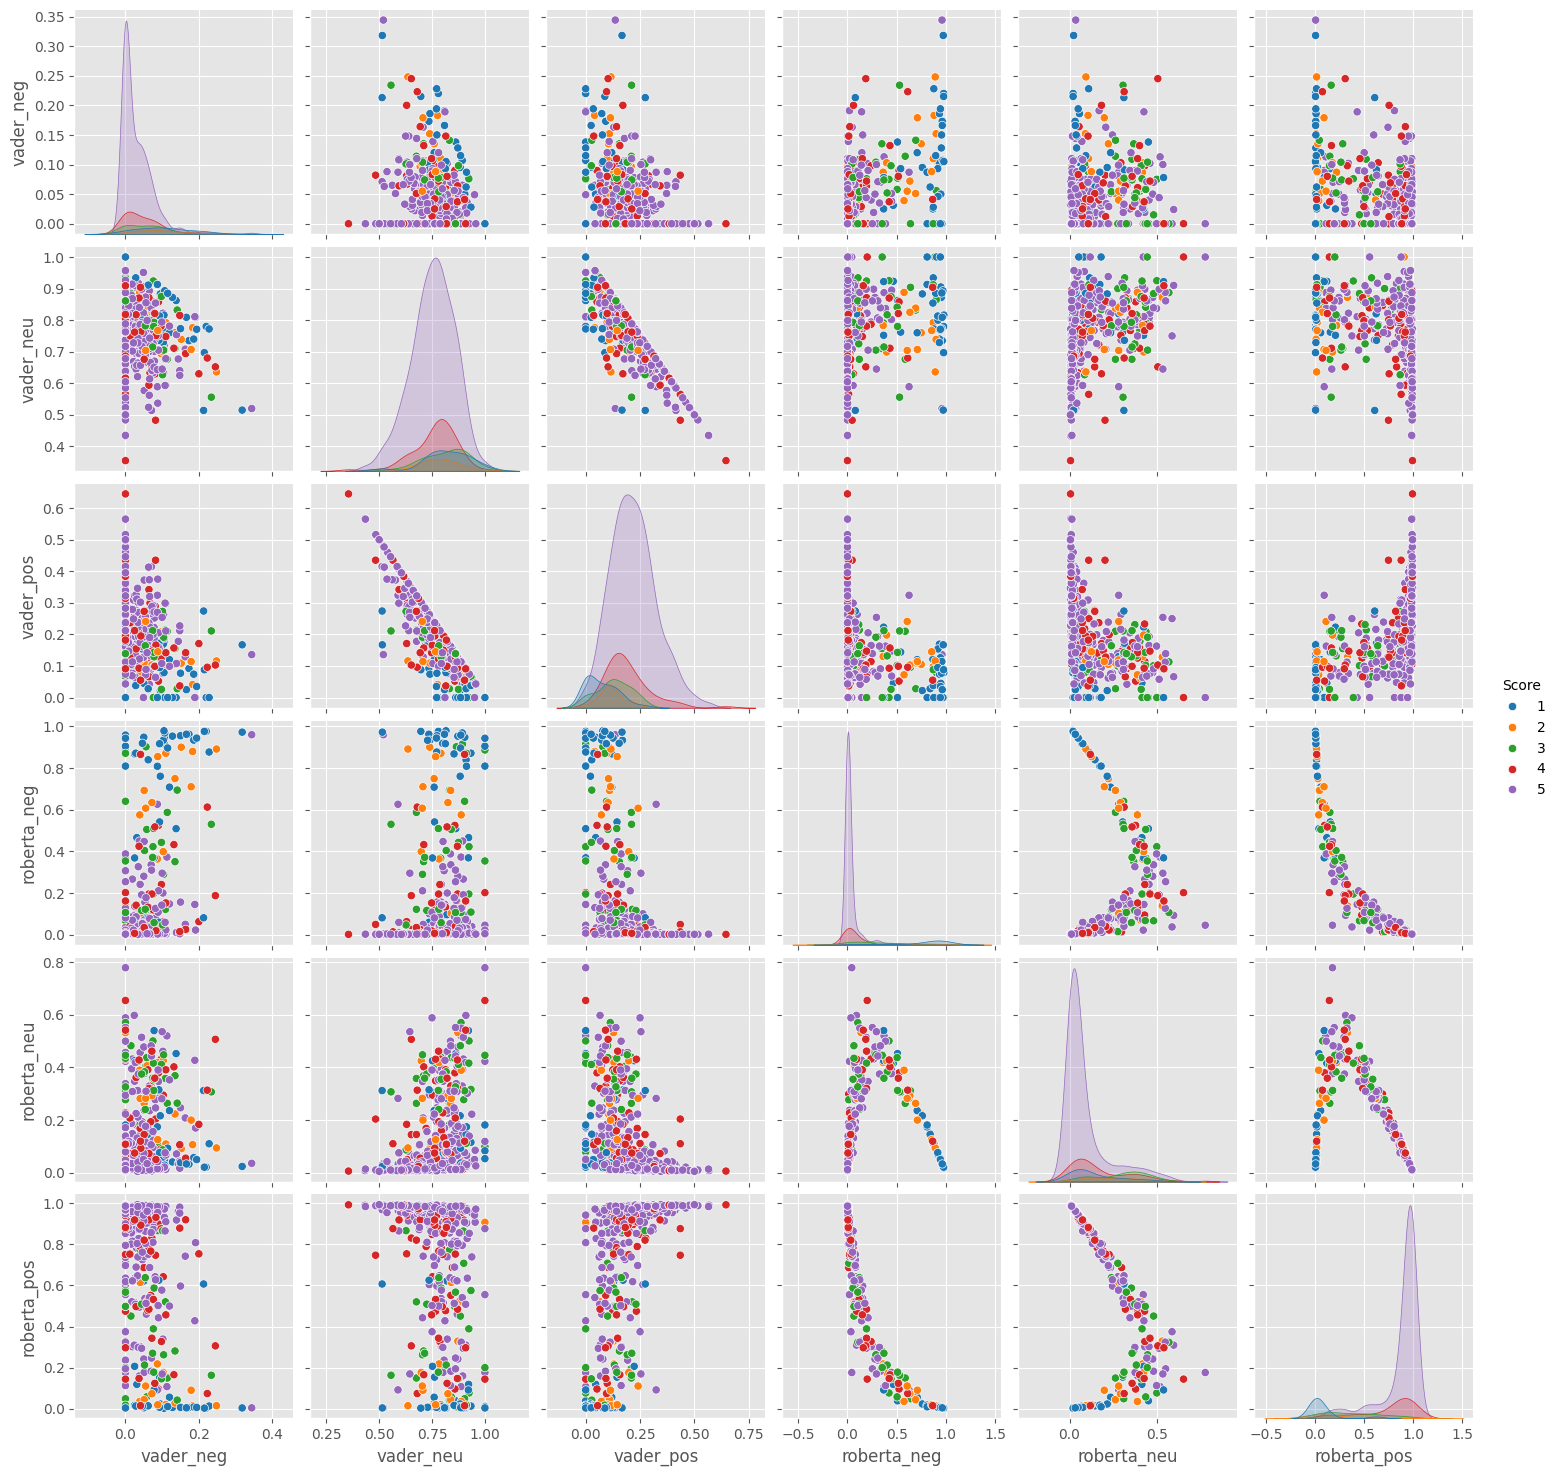

In [47]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

______________

# Review Examples

#### Let's have a look at a `positive` example which have `1 star`.

In [ ]:
# Roberta
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [ ]:
# Vader
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

#### Let's have a look at a `negative` example which have `5 star`.

In [66]:
# Roberta
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
# Vader
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

_____________